In [1]:
using Plots, LinearAlgebra

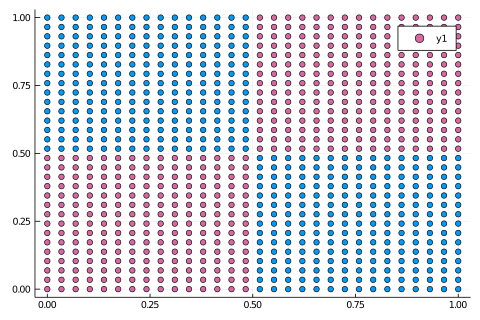

In [67]:
domain = range(0, stop=1, length=30)
X = vec([[x1; x2] for x1 in domain, x2 in domain])
Y = [xor(round(Int, x[1]), round(Int, x[2])) for x in X]
scatter(map(x->x[1], X), map(x->x[2], X), color=Y, dpi=20)

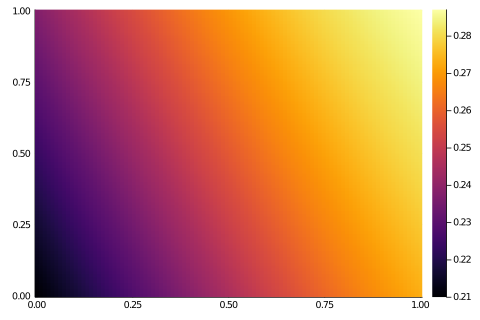

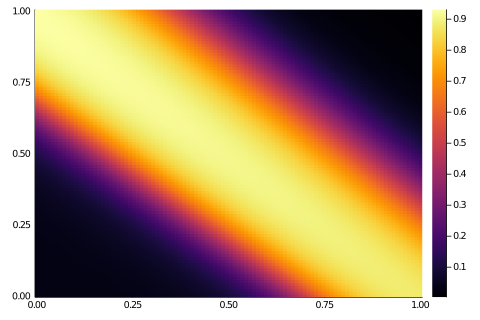

  7.230691 seconds (38.89 M allocations: 2.409 GiB, 5.93% gc time)


In [76]:
sigma(x) = 1/(1+exp(-x))
sigmaprime(x) = sigma(x)*(1-sigma(x))
w2, b2, w3, b3 = [
    randn(4, 2), # w2
    randn(4, 1), # b2
    randn(1, 4), # w3
    randn(1, 1) # b3
]
display(heatmap(
    range(0, stop=1, length=100),
    range(0, stop=1, length=100),
    (x1, x2) -> sigma.(w3*(sigma.(w2*[x1,x2] + b2))+b3)[1],
    dpi=20
))
@time for epoch in 1:1_000
    for (x, y) in zip(X, Y)
        a1 = x

        z2 = w2*a1 + b2
        a2 = sigma.(z2)
        z3 = w3*a2 + b3
        a3 = sigma.(z3)
        
        delta3 = (a3 - [y]) .* sigmaprime.(z3)
        delta2 = (w3'*delta3) .* sigmaprime.(z2)
        
        dCdb2 = delta2
        dCdb3 = delta3

        dCdw2 = delta2*a1'
        dCdw3 = delta3*a2'
        
        eta = 1e-2
        w2 -= (eta * dCdw2)
        b2 -= (eta * dCdb2)
        w3 -= (eta * dCdw3)
        b3 -= (eta * dCdb3)
    end
end
display(heatmap(
    range(0, stop=1, length=100),
    range(0, stop=1, length=100),
    (x1, x2) -> sigma.(w3*(sigma.(w2*[x1,x2] + b2))+b3)[1],
    dpi=20
))